## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
import seaborn as sns

In [2]:
# Creating a dictionary of file names and df names to faciliate importing

# datasets_dict = {'bom.movie_gross':'bom_movie_gross','imdb.name.basics':'imdb_name_basics',
#                  'imdb.title.akas':'imdb_title_akas','imdb.title.basics':'imdb_title_basics',
#                  'imdb.title.crew':'imdb_title_crew','imdb.title.principals':'imdb_title_principals',
#                  'imdb.title.ratings':'imdb_title_ratings','tmdb.movies':'tmdb_movies',
#                  'tn.movie_budgets':'tn_movie_budgets'}

# def import_datasets(key, value):
#     value = pd.read_csv(f'./zippedData/{key}.csv.gz', compression='gzip', 
#                                  header=0, sep=',', quotechar='"')
#     return value
 
# for key, value in datasets_dict.items():
#     import_datasets(key, value)    

9 `CSV` datasets

In [3]:
bom_movie_gross = pd.read_csv('zippedData/bom.movie_gross.csv.gz', compression='gzip', 
                                 header=0, sep=',', quotechar='"')
imdb_name_basics = pd.read_csv('zippedData/imdb.name.basics.csv.gz', compression='gzip', 
                                 header=0, sep=',', quotechar='"')
imdb_title_akas = pd.read_csv('zippedData/imdb.title.akas.csv.gz', compression='gzip', 
                                 header=0, sep=',', quotechar='"')
imdb_title_basics = pd.read_csv('zippedData/imdb.title.basics.csv.gz', compression='gzip', 
                                 header=0, sep=',', quotechar='"')
imdb_title_crew = pd.read_csv('zippedData/imdb.title.crew.csv.gz', compression='gzip', 
                                 header=0, sep=',', quotechar='"')
imdb_title_principals = pd.read_csv('zippedData/imdb.title.principals.csv.gz', compression='gzip', 
                                 header=0, sep=',', quotechar='"')
imdb_title_ratings = pd.read_csv('zippedData/imdb.title.ratings.csv.gz', compression='gzip', 
                                 header=0, sep=',', quotechar='"')
tmdb_movies = pd.read_csv('zippedData/tmdb.movies.csv.gz', compression='gzip', 
                                 header=0, sep=',', quotechar='"')
tn_movie_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz', compression='gzip', 
                                 header=0, sep=',', quotechar='"')

2 `TSV` datasets

In [4]:
rt_movie_info = pd.read_csv('zippedData/rt.movie_info.tsv.gz', compression='gzip', 
                                 header=0, sep='\t', encoding='ISO-8859-1', quotechar='"')

rt_reviews = pd.read_csv('zippedData/rt.reviews.tsv.gz', compression='gzip', 
                                 header=0, sep='\t', encoding='ISO-8859-1', quotechar='"')

## EDA on `bom_movie_gross`

In [5]:
bom_movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


### Info 
#### Missing Values
* ~ 1300 missing in Foreign Gross and convert to float
* ~ 30 in domestic gross (already float)
* Studio is missing 5 values, may not be important

In [6]:
bom_movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
title             3387 non-null object
studio            3382 non-null object
domestic_gross    3359 non-null float64
foreign_gross     2037 non-null object
year              3387 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


Set _index_ to movie title

In [7]:
bom_movie_gross.set_index(['title'], inplace=True)

__Domestic Gross__ 
_Top 5_

Divide column by 1 million to makes totals easier to evaluate

In [8]:
bom_movie_gross['domestic_gross_mm'] = bom_movie_gross['domestic_gross'] / 1000000

In [9]:
bom_movie_gross.sort_values(by='domestic_gross_mm', ascending=False)[:5]

,studio,domestic_gross,foreign_gross,year,domestic_gross_mm
title,,,,,
Star Wars: The Force Awakens,BV,936700000.0,"1,131.6",2015,936.7
Black Panther,BV,700100000.0,646900000,2018,700.1
Avengers: Infinity War,BV,678800000.0,"1,369.5",2018,678.8
Jurassic World,Uni.,652300000.0,"1,019.4",2015,652.3
Marvel's The Avengers,BV,623400000.0,895500000,2012,623.4


If over 1 billion, total is annotated as such `"1,131.6"` see foreign gross for Star Wars from [Box Office Mojo](https://www.boxofficemojo.com/title/tt2488496/?ref_=bo_se_r_8).

__Foreign Gross__

_Cannot sort because dtype is object_

Additionally, scale needs to be adjusted, to the same way `domestic_gross` is annotated, so that data can be analyzed on the same scale. 

In [10]:
bom_movie_gross.sort_values(by='foreign_gross', ascending=False)[:5]

,studio,domestic_gross,foreign_gross,year,domestic_gross_mm
title,,,,,
Life's a Breeze,Magn.,3500.0,99700,2014,0.0035
The East,FoxS,2300000.0,99700,2013,2.3000
White Lion,Scre.,NaN,99600,2010,NaN
A United Kingdom,FoxS,3900000.0,9900000,2017,3.9000
Le Havre,Jan.,612000.0,9900000,2011,0.6120


_These are the 5 films that had foreign gross > 1 billion_

In [11]:
# filter foreign gross over 1 billion
bill_filt = bom_movie_gross['foreign_gross'].str.contains(',', na=False)
bom_movie_gross[bill_filt]

,studio,domestic_gross,foreign_gross,year,domestic_gross_mm
title,,,,,
Star Wars: The Force Awakens,BV,936700000.0,"1,131.6",2015,936.7
Jurassic World,Uni.,652300000.0,"1,019.4",2015,652.3
Furious 7,Uni.,353000000.0,"1,163.0",2015,353.0
The Fate of the Furious,Uni.,226000000.0,"1,010.0",2017,226.0
Avengers: Infinity War,BV,678800000.0,"1,369.5",2018,678.8


#### Create Python Script
* Checks if value is a string 
* If True, check for comma. 
* If True remove comma and convert to float. 
* If False, return float and divide by 1 million 
* Otherwise the value is numeric.

Once column is converted to floats all in the same decimal level, then they can be divided by 1 million to get correct scalling of foreign_gross. 

This function could be called clean_convert_gross.

In [12]:
from clean_data import *

In [13]:
bom_movie_gross['foreign_gross_mm'] = bom_movie_gross['foreign_gross'].apply(clean_convert_gross)

In [14]:
bom_movie_gross.head()

,studio,domestic_gross,foreign_gross,year,domestic_gross_mm,foreign_gross_mm
title,,,,,,
Toy Story 3,BV,415000000.0,652000000,2010,415.0,652.0
Alice in Wonderland (2010),BV,334200000.0,691300000,2010,334.2,691.3
Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010,296.0,664.3
Inception,WB,292600000.0,535700000,2010,292.6,535.7
Shrek Forever After,P/DW,238700000.0,513900000,2010,238.7,513.9


Sort by new column `foreign_gross_mm` to get top 5 foreign gross.

In [15]:
bom_movie_gross.sort_values(by='foreign_gross_mm', ascending=False)[:5]

,studio,domestic_gross,foreign_gross,year,domestic_gross_mm,foreign_gross_mm
title,,,,,,
Avengers: Infinity War,BV,678800000.0,"1,369.5",2018,678.8,1369.5
Furious 7,Uni.,353000000.0,"1,163.0",2015,353.0,1163.0
Star Wars: The Force Awakens,BV,936700000.0,"1,131.6",2015,936.7,1131.6
Jurassic World,Uni.,652300000.0,"1,019.4",2015,652.3,1019.4
The Fate of the Furious,Uni.,226000000.0,"1,010.0",2017,226.0,1010.0


Create a `total_gross` column

In [16]:
bom_movie_gross['total_gross'] = bom_movie_gross['domestic_gross_mm'] + bom_movie_gross['foreign_gross_mm']

In [17]:
bom_movie_gross.sort_values(by='total_gross', ascending=False)[:5]

,studio,domestic_gross,foreign_gross,year,domestic_gross_mm,foreign_gross_mm,total_gross
title,,,,,,,
Star Wars: The Force Awakens,BV,936700000.0,"1,131.6",2015,936.7,1131.6,2068.3
Avengers: Infinity War,BV,678800000.0,"1,369.5",2018,678.8,1369.5,2048.3
Jurassic World,Uni.,652300000.0,"1,019.4",2015,652.3,1019.4,1671.7
Marvel's The Avengers,BV,623400000.0,895500000,2012,623.4,895.5,1518.9
Furious 7,Uni.,353000000.0,"1,163.0",2015,353.0,1163.0,1516.0


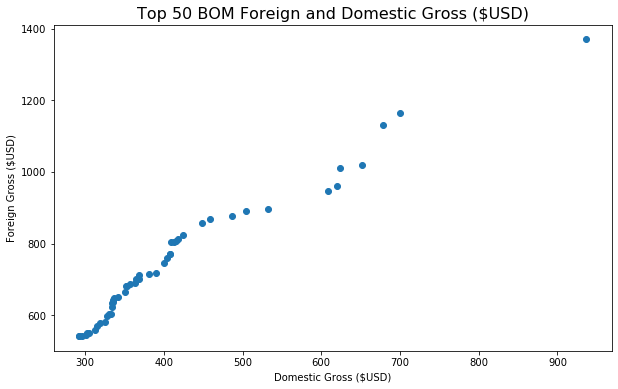

In [18]:
# plot a basic graph showing top 50 total grossing movies
x = bom_movie_gross['domestic_gross_mm'].sort_values(ascending=False)[:50]
y = bom_movie_gross['foreign_gross_mm'].sort_values(ascending=False)[:50]

plt.figure(figsize=(10,6))

plt.scatter(x, y)
plt.xlabel('Domestic Gross ($USD)')
plt.ylabel('Foreign Gross ($USD)')
plt.title('Top 50 BOM Foreign and Domestic Gross ($USD)', fontsize=16)
plt.show();

### Categorizing the genre variable in the IMDB dataset.  The original genres classification contained 1085 
### unique classifications.  These are combinations of certain basic classifications.  Here creating non-mutually 
### exclusive genre classifications.

In [19]:
imdb_title_basics['genres'].nunique()

1085

In [20]:
imdb_title_basics['genres']

0           Action,Crime,Drama
1              Biography,Drama
2                        Drama
3                 Comedy,Drama
4         Comedy,Drama,Fantasy
                  ...         
146139                   Drama
146140             Documentary
146141                  Comedy
146142                     NaN
146143             Documentary
Name: genres, Length: 146144, dtype: object

In [21]:
#creating a list of all genres
list_of_genres = list(imdb_title_basics['genres'])

#python is interpreting nan as a float which prevents us iterating over this entries with string methods
# imdb_title_basics['genres'].isna().sum()
#Using the isinstance to get around this problem
list_of_genres2 = []

for a in range(0, len(list_of_genres)):
    if isinstance(list_of_genres[a], str):
        list_of_genres2.append(list_of_genres[a])

#Multiple entries are seperated by commas. Using split function to make each genre an individual entry.
list_of_genres3 = []
for a in range(0, len(list_of_genres2)):
    list_of_genres3.extend(list_of_genres2[a].split(','))

#Using set function to get the list of unique genres    
unique_genres = set(list_of_genres3)

unique_genres

{'Action',
 'Adult',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Game-Show',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Short',
 'Sport',
 'Talk-Show',
 'Thriller',
 'War',
 'Western'}

In [22]:
#Using the unique_genres list to create the non-mutually exclusive variables

for genre in unique_genres:
    imdb_title_basics[f'{genre}_movie'] = imdb_title_basics['genres'].str.contains(f'{genre}')

In [23]:
imdb_title_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,War_movie,Comedy_movie,Mystery_movie,Western_movie,...,Game-Show_movie,Adult_movie,History_movie,Biography_movie,Action_movie,Sport_movie,Family_movie,Music_movie,Romance_movie,Horror_movie
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


Merge IMDB_title_basics with BOM_movie_gross

In [24]:
imdb_title_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 33 columns):
tconst               146144 non-null object
primary_title        146144 non-null object
original_title       146123 non-null object
start_year           146144 non-null int64
runtime_minutes      114405 non-null float64
genres               140736 non-null object
War_movie            140736 non-null object
Comedy_movie         140736 non-null object
Mystery_movie        140736 non-null object
Western_movie        140736 non-null object
Documentary_movie    140736 non-null object
Reality-TV_movie     140736 non-null object
Crime_movie          140736 non-null object
Talk-Show_movie      140736 non-null object
Musical_movie        140736 non-null object
Fantasy_movie        140736 non-null object
Sci-Fi_movie         140736 non-null object
Adventure_movie      140736 non-null object
News_movie           140736 non-null object
Thriller_movie       140736 non-null object
Drama_mov

In [25]:
bom_movie_gross.reset_index(inplace=True)

In [26]:
imdb_title_basics.sort_values(by='primary_title')

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,War_movie,Comedy_movie,Mystery_movie,Western_movie,...,Game-Show_movie,Adult_movie,History_movie,Biography_movie,Action_movie,Sport_movie,Family_movie,Music_movie,Romance_movie,Horror_movie
13871,tt1699720,!Women Art Revolution,Women Art Revolution,2010,83.0,Documentary,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
37039,tt2346170,#1 Serial Killer,#1 Serial Killer,2013,87.0,Horror,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
52892,tt3120962,#5,#5,2013,68.0,"Biography,Comedy,Fantasy",False,True,False,False,...,False,False,False,True,False,False,False,False,False,False
131857,tt8219776,#5,#5,2018,NaN,Documentary,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
77936,tt4470336,#50Fathers,#50Fathers,2015,132.0,Comedy,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61849,tt3566826,è solo questione di punti di vista,è solo questione di punti di vista,2012,103.0,"Action,Adventure,Comedy",False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
61401,tt3547074,è solo questione di tempo,è solo questione di tempo,2013,72.0,Comedy,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
139058,tt8976950,élèctions piege à cons,élèctions piege à cons,2014,NaN,Comedy,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
102502,tt5997078,împetu,împetu,2017,NaN,Documentary,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


titles in the imdb dataset were duplicated; merging on title and year to correctly merge with corresponding gross in the BOM movie dataset

In [27]:
bom_gross_title_basics = pd.merge(bom_movie_gross, imdb_title_basics, how='left', 
                                  left_on=['title','year'], right_on=['primary_title','start_year'])

In [28]:
bom_gross_title_basics.head()

,title,studio,domestic_gross,foreign_gross,year,domestic_gross_mm,foreign_gross_mm,total_gross,tconst,primary_title,...,Game-Show_movie,Adult_movie,History_movie,Biography_movie,Action_movie,Sport_movie,Family_movie,Music_movie,Romance_movie,Horror_movie
0,Toy Story 3,BV,415000000.0,652000000,2010,415.0,652.0,1067.0,tt0435761,Toy Story 3,...,False,False,False,False,False,False,False,False,False,False
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010,334.2,691.3,1025.5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010,296.0,664.3,960.3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Inception,WB,292600000.0,535700000,2010,292.6,535.7,828.3,tt1375666,Inception,...,False,False,False,False,True,False,False,False,False,False
4,Shrek Forever After,P/DW,238700000.0,513900000,2010,238.7,513.9,752.6,tt0892791,Shrek Forever After,...,False,False,False,False,False,False,False,False,False,False


In [29]:
bom_gross_title_basics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3427 entries, 0 to 3426
Data columns (total 41 columns):
title                3427 non-null object
studio               3422 non-null object
domestic_gross       3399 non-null float64
foreign_gross        2061 non-null object
year                 3427 non-null int64
domestic_gross_mm    3399 non-null float64
foreign_gross_mm     2061 non-null float64
total_gross          2033 non-null float64
tconst               1873 non-null object
primary_title        1873 non-null object
original_title       1873 non-null object
start_year           1873 non-null float64
runtime_minutes      1863 non-null float64
genres               1871 non-null object
War_movie            1871 non-null object
Comedy_movie         1871 non-null object
Mystery_movie        1871 non-null object
Western_movie        1871 non-null object
Documentary_movie    1871 non-null object
Reality-TV_movie     1871 non-null object
Crime_movie          1871 non-null object
Talk-S

In [30]:
bom_gross_title_basics_ratings = pd.merge(bom_gross_title_basics, imdb_title_ratings, how='left', 
                                  left_on='tconst', right_on='tconst')

In [31]:
bom_gross_title_basics_ratings.head()

,title,studio,domestic_gross,foreign_gross,year,domestic_gross_mm,foreign_gross_mm,total_gross,tconst,primary_title,...,History_movie,Biography_movie,Action_movie,Sport_movie,Family_movie,Music_movie,Romance_movie,Horror_movie,averagerating,numvotes
0,Toy Story 3,BV,415000000.0,652000000,2010,415.0,652.0,1067.0,tt0435761,Toy Story 3,...,False,False,False,False,False,False,False,False,8.3,682218.0
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010,334.2,691.3,1025.5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010,296.0,664.3,960.3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Inception,WB,292600000.0,535700000,2010,292.6,535.7,828.3,tt1375666,Inception,...,False,False,True,False,False,False,False,False,8.8,1841066.0
4,Shrek Forever After,P/DW,238700000.0,513900000,2010,238.7,513.9,752.6,tt0892791,Shrek Forever After,...,False,False,False,False,False,False,False,False,6.3,167532.0


### Bivariable analysis of gross profit by genre

In [32]:
bom_gross_title_basics_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3427 entries, 0 to 3426
Data columns (total 43 columns):
title                3427 non-null object
studio               3422 non-null object
domestic_gross       3399 non-null float64
foreign_gross        2061 non-null object
year                 3427 non-null int64
domestic_gross_mm    3399 non-null float64
foreign_gross_mm     2061 non-null float64
total_gross          2033 non-null float64
tconst               1873 non-null object
primary_title        1873 non-null object
original_title       1873 non-null object
start_year           1873 non-null float64
runtime_minutes      1863 non-null float64
genres               1871 non-null object
War_movie            1871 non-null object
Comedy_movie         1871 non-null object
Mystery_movie        1871 non-null object
Western_movie        1871 non-null object
Documentary_movie    1871 non-null object
Reality-TV_movie     1871 non-null object
Crime_movie          1871 non-null object
Talk-S

In [51]:
print(bom_gross_title_basics_ratings['domestic_gross_mm'].mean())
print(bom_gross_title_basics_ratings['domestic_gross_mm'].median())

28.682456922035893
1.4


Checking number of observations from 2015 onwards

In [33]:
bom_gross_title_basics_ratings[bom_gross_title_basics_ratings['year'] > 2014]

,title,studio,domestic_gross,foreign_gross,year,domestic_gross_mm,foreign_gross_mm,total_gross,tconst,primary_title,...,History_movie,Biography_movie,Action_movie,Sport_movie,Family_movie,Music_movie,Romance_movie,Horror_movie,averagerating,numvotes
1888,Star Wars: The Force Awakens,BV,936700000.0,"1,131.6",2015,936.7000,1131.6,2068.3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1889,Jurassic World,Uni.,652300000.0,"1,019.4",2015,652.3000,1019.4,1671.7,tt0369610,Jurassic World,...,False,False,True,False,False,False,False,False,7.0,539338.0
1890,Furious 7,Uni.,353000000.0,"1,163.0",2015,353.0000,1163.0,1516.0,tt2820852,Furious 7,...,False,False,True,False,False,False,False,False,7.2,335074.0
1891,Avengers: Age of Ultron,BV,459000000.0,946400000,2015,459.0000,946.4,1405.4,tt2395427,Avengers: Age of Ultron,...,False,False,True,False,False,False,False,False,7.3,665594.0
1892,Minions,Uni.,336000000.0,823400000,2015,336.0000,823.4,1159.4,tt2293640,Minions,...,False,False,False,False,False,False,False,False,6.4,193917.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3422,The Quake,Magn.,6200.0,NaN,2018,0.0062,NaN,NaN,tt6523720,The Quake,...,False,False,True,False,False,False,False,False,6.2,5270.0
3423,Edward II (2018 re-release),FM,4800.0,NaN,2018,0.0048,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3424,El Pacto,Sony,2500.0,NaN,2018,0.0025,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3425,The Swan,Synergetic,2400.0,NaN,2018,0.0024,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
bom_gross_title_basics_ratings.groupby(['Sci-Fi_movie'])['domestic_gross_mm'].mean()[1]

132.72634906481483

In [35]:
unique_genres = list(unique_genres)

In [36]:
unique_genres

['War',
 'Comedy',
 'Mystery',
 'Western',
 'Documentary',
 'Reality-TV',
 'Crime',
 'Talk-Show',
 'Musical',
 'Fantasy',
 'Sci-Fi',
 'Adventure',
 'News',
 'Thriller',
 'Drama',
 'Short',
 'Animation',
 'Game-Show',
 'Adult',
 'History',
 'Biography',
 'Action',
 'Sport',
 'Family',
 'Music',
 'Romance',
 'Horror']

In [37]:
for genre in unique_genres:
    print(bom_gross_title_basics_ratings[f'''{genre}_movie'''].value_counts())

False    1847
True       24
Name: War_movie, dtype: int64
False    1215
True      656
Name: Comedy_movie, dtype: int64
False    1740
True      131
Name: Mystery_movie, dtype: int64
False    1860
True       11
Name: Western_movie, dtype: int64
False    1756
True      115
Name: Documentary_movie, dtype: int64
False    1871
Name: Reality-TV_movie, dtype: int64
False    1602
True      269
Name: Crime_movie, dtype: int64
False    1871
Name: Talk-Show_movie, dtype: int64
False    1859
True       12
Name: Musical_movie, dtype: int64
False    1747
True      124
Name: Fantasy_movie, dtype: int64
False    1762
True      109
Name: Sci-Fi_movie, dtype: int64
False    1508
True      363
Name: Adventure_movie, dtype: int64
False    1870
True        1
Name: News_movie, dtype: int64
False    1581
True      290
Name: Thriller_movie, dtype: int64
True     968
False    903
Name: Drama_movie, dtype: int64
False    1871
Name: Short_movie, dtype: int64
False    1757
True      114
Name: Animation_movie, dtyp

Due to a lack of data the following categories will no longer be considered for analysis: News_movie, Talk-Show_movie, Game-Show_movie, Short_movie, Adult_movie, Reality-TV_movie

We will proceed with Western_movie and Musical_movie (11 and 12 observations respectively) 

In [38]:
for genre in unique_genres:
    print(bom_gross_title_basics_ratings.loc[bom_gross_title_basics_ratings['year'] > 2014, f'''{genre}_movie'''].value_counts())

False    845
True      12
Name: War_movie, dtype: int64
False    582
True     275
Name: Comedy_movie, dtype: int64
False    789
True      68
Name: Mystery_movie, dtype: int64
False    855
True       2
Name: Western_movie, dtype: int64
False    804
True      53
Name: Documentary_movie, dtype: int64
False    857
Name: Reality-TV_movie, dtype: int64
False    735
True     122
Name: Crime_movie, dtype: int64
False    857
Name: Talk-Show_movie, dtype: int64
False    853
True       4
Name: Musical_movie, dtype: int64
False    802
True      55
Name: Fantasy_movie, dtype: int64
False    812
True      45
Name: Sci-Fi_movie, dtype: int64
False    681
True     176
Name: Adventure_movie, dtype: int64
False    857
Name: News_movie, dtype: int64
False    734
True     123
Name: Thriller_movie, dtype: int64
True     454
False    403
Name: Drama_movie, dtype: int64
False    857
Name: Short_movie, dtype: int64
False    799
True      58
Name: Animation_movie, dtype: int64
False    857
Name: Game-Show_movi

Restricting by year 2015 or later Westerns and Musicals only have 2 and 4 observations.  Will additionally exclude these categories from analysis

Sport_movie only has 14 observations and War_movie 12 but will include for now.

In [39]:
unique_genres_analysis = unique_genres

In [40]:
unique_genres_analysis.remove('News')
unique_genres_analysis.remove('Talk-Show')
unique_genres_analysis.remove('Game-Show')
unique_genres_analysis.remove('Short')
unique_genres_analysis.remove('Adult')
unique_genres_analysis.remove('Western')
unique_genres_analysis.remove('Musical')
unique_genres_analysis.remove('Reality-TV')

In [41]:
unique_genres_analysis

['War',
 'Comedy',
 'Mystery',
 'Documentary',
 'Crime',
 'Fantasy',
 'Sci-Fi',
 'Adventure',
 'Thriller',
 'Drama',
 'Animation',
 'History',
 'Biography',
 'Action',
 'Sport',
 'Family',
 'Music',
 'Romance',
 'Horror']

In [45]:
# mean_gross_by_genre = []
for genre in unique_genres_analysis:
    a = bom_gross_title_basics_ratings.groupby([f'{genre}_movie'])['domestic_gross_mm'].mean()[1]
    print(genre, a)
    
# mean_gross_by_genre

War 9.975170833333332
Comedy 45.47524509785934
Mystery 33.41104580152672
Documentary 6.415689456140352
Crime 30.594852985074652
Fantasy 67.23078454471545
Sci-Fi 132.72634906481483
Adventure 112.06330882596677
Thriller 39.811611111111105
Drama 23.201862054054065
Animation 115.43685349122808
History 25.84073647297297
Biography 27.873123549738224
Action 69.65483838003836
Sport 28.551257142857143
Family 60.67216543209875
Music 26.950622535211263
Romance 19.871570996666662
Horror 35.72114344827585


In [46]:
mean_gross_by_genre = []
for genre in unique_genres_analysis:
    a = bom_gross_title_basics_ratings.groupby([f'{genre}_movie'])['domestic_gross_mm'].mean()[1]
    mean_gross_by_genre.append(a)
    
mean_gross_by_genre

[9.975170833333332,
 45.47524509785934,
 33.41104580152672,
 6.415689456140352,
 30.594852985074652,
 67.23078454471545,
 132.72634906481483,
 112.06330882596677,
 39.811611111111105,
 23.201862054054065,
 115.43685349122808,
 25.84073647297297,
 27.873123549738224,
 69.65483838003836,
 28.551257142857143,
 60.67216543209875,
 26.950622535211263,
 19.871570996666662,
 35.72114344827585]

In [50]:
median_gross_by_genre = []
for genre in unique_genres_analysis:
    a = bom_gross_title_basics_ratings.groupby([f'{genre}_movie'])['domestic_gross_mm'].median()[1]
    median_gross_by_genre.append(a)
    
median_gross_by_genre

[0.9475,
 17.85,
 15.8,
 0.531,
 10.8,
 31.1,
 79.2,
 64.7,
 15.8,
 4.2,
 85.15,
 3.65,
 6.7,
 25.1,
 13.7,
 43.9,
 3.7,
 3.05,
 21.7]

In [70]:
mean_foreign_by_genre = []
for genre in unique_genres_analysis:
    a = bom_gross_title_basics_ratings.groupby([f'{genre}_movie'])['foreign_gross_mm'].mean()[1]
    mean_foreign_by_genre.append(a)
    
median_foreign_by_genre = []
for genre in unique_genres_analysis:
    a = bom_gross_title_basics_ratings.groupby([f'{genre}_movie'])['foreign_gross_mm'].median()[1]
    median_foreign_by_genre.append(a)
    
mean_total_by_genre = []
for genre in unique_genres_analysis:
    a = bom_gross_title_basics_ratings.groupby([f'{genre}_movie'])['total_gross'].mean()[1]
    mean_total_by_genre.append(a)
    
median_total_by_genre = []
for genre in unique_genres_analysis:
    a = bom_gross_title_basics_ratings.groupby([f'{genre}_movie'])['total_gross'].median()[1]
    median_total_by_genre.append(a)    

In [69]:
# #Can't figure out how to insert looping vars in new list name

# gross_cat = ['domestic_gross_mm','foreign_gross_mm','total_gross']
# metric = ['mean','median']

# for gross in gross_cat:
#     for met in metric:
#     f'{met}'_f'{gross}'_by_genre = []
#         for genre in unique_genres_analysis:
#             a = bom_gross_title_basics_ratings.groupby([f'{genre}_movie'])[gross].met()[1]
#             f'{met}'_f'{gross}'_by_genre.append(a)

IndentationError: expected an indented block (<ipython-input-69-ae0365a41b2e>, line 8)

In [ ]:
# #CODING GRAVEYARD   
#     for met in metric:
#         met_gross_by_genre = []
        
        
        
#         for genre in unique_genres_analysis:
#             a = bom_gross_title_basics_ratings.groupby([f'{genre}_movie'])[gross].met()[1]
#             met_gross_by_genre.append(a)
            
            
#             for gross_mm in gross_cat:
#     mean_f'''{gross_mm}'''_by_genre = []
#     for genre in unique_genres_analysis:
#         a = bom_gross_title_basics_ratings.groupby([f'{genre}_movie'])[gross_mm].mean()[1]
#         mean_f'''{gross_mm}'''_by_genre.append(a)
    
#     median_f'''{gross_mm}'''_by_genre = []
#     for genre in unique_genres_analysis:
#         b = bom_gross_title_basics_ratings.groupby([f'{genre}_movie'])[gross_mm].median()[1]
#         median_f'''{gross_mm}'''_by_genre.append(b)   

In [75]:
genre_df = pd.DataFrame(
    {'genre': unique_genres_analysis,
    'mean_dom_gross': mean_gross_by_genre,
    'median_dom_gross': median_gross_by_genre,
    'mean_foreign_gross': mean_foreign_by_genre,
    'median_foreign_gross': median_foreign_by_genre,
    'mean_total_gross': mean_total_by_genre,
    'median_total_gross': median_total_by_genre
    })
genre_df

,genre,mean_dom_gross,median_dom_gross,mean_foreign_gross,median_foreign_gross,mean_total_gross,median_total_gross
0,War,9.975171,0.9475,19.903455,3.70,38.741455,3.931
1,Comedy,45.475245,17.8500,87.703017,32.00,150.105135,78.100
2,Mystery,33.411046,15.8000,66.258639,35.80,110.173075,76.550
3,Documentary,6.415689,0.5310,12.932485,2.10,26.605593,8.105
4,Crime,30.594853,10.8000,55.873041,25.50,98.297287,51.700
5,Fantasy,67.230785,31.1000,160.496321,67.25,243.296635,113.200
6,Sci-Fi,132.726349,79.2000,246.265441,187.10,390.593396,284.200
7,Adventure,112.063309,64.7000,232.694106,161.55,357.036653,243.800
8,Thriller,39.811611,15.8000,99.913275,33.40,154.565734,70.000
9,Drama,23.201862,4.2000,49.418280,18.50,84.821912,43.100


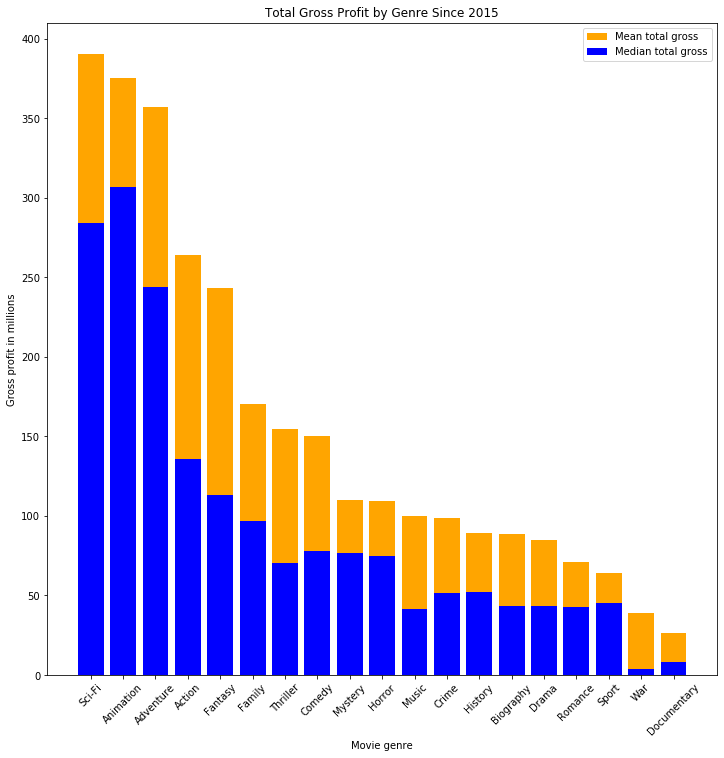

In [95]:
genre_df.sort_values(by='mean_total_gross', ascending =False, inplace=True)

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)

ax.bar(x='genre', height = 'mean_total_gross', data=genre_df, color='orange',label='Mean total gross')
ax.bar(x='genre', height = 'median_total_gross', data=genre_df, color='blue',label='Median total gross')

plt.xticks(rotation=45)
plt.legend();

ax.set_xlabel('Movie genre')
ax.set_ylabel('Gross profit in millions')
ax.set_title('Total Gross Profit by Genre Since 2015')
plt.savefig('total_gross.png')

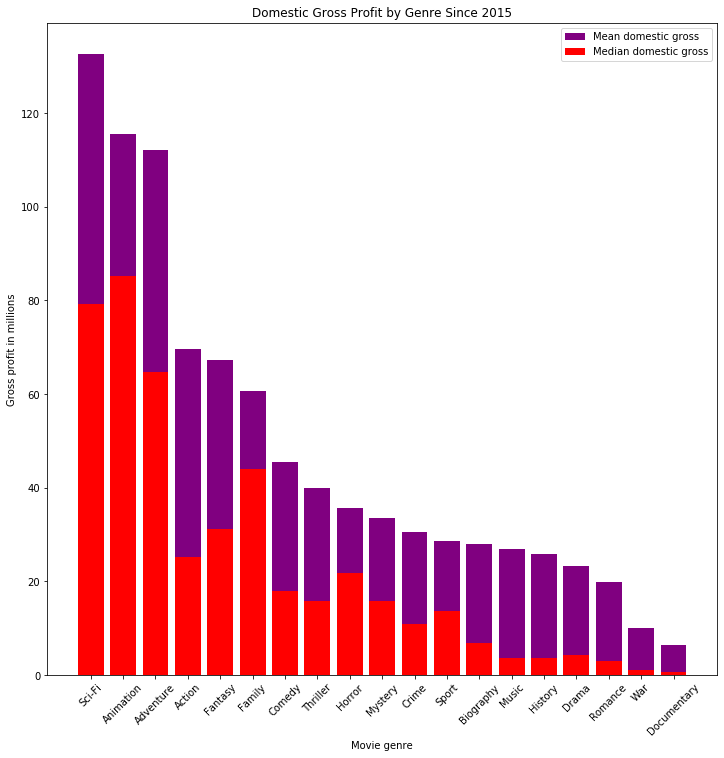

In [100]:
genre_df.sort_values(by='mean_dom_gross', ascending =False, inplace=True)

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)

ax.bar(x='genre', height = 'mean_dom_gross', data=genre_df, color='purple',label='Mean domestic gross')
ax.bar(x='genre', height = 'median_dom_gross', data=genre_df, color='red',label='Median domestic gross')

plt.xticks(rotation=45)
plt.legend();

ax.set_xlabel('Movie genre')
ax.set_ylabel('Gross profit in millions')
ax.set_title('Domestic Gross Profit by Genre Since 2015')
plt.savefig('dom_gross.png')

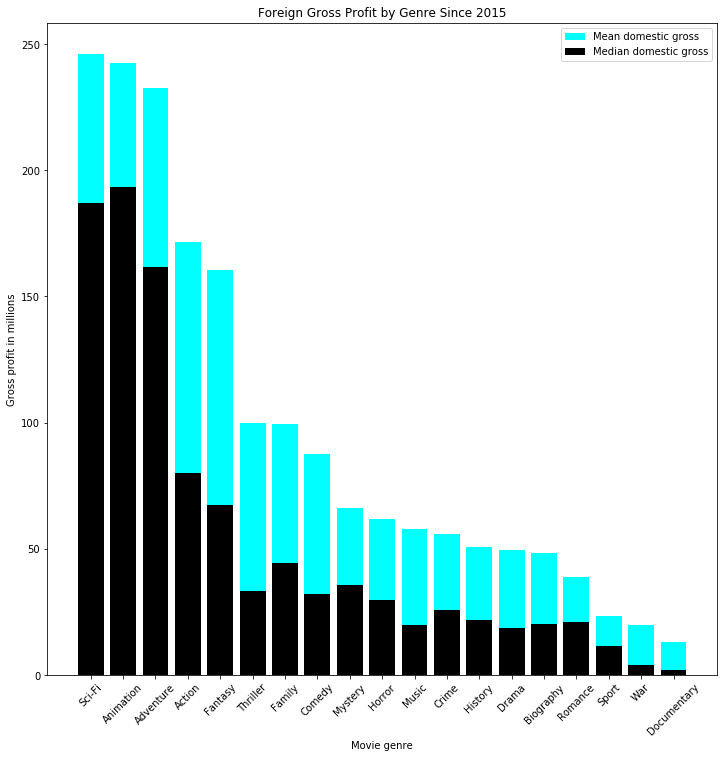

In [102]:
genre_df.sort_values(by='mean_foreign_gross', ascending =False, inplace=True)

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)

ax.bar(x='genre', height = 'mean_foreign_gross', data=genre_df, color='cyan',label='Mean domestic gross')
ax.bar(x='genre', height = 'median_foreign_gross', data=genre_df, color='black',label='Median domestic gross')

plt.xticks(rotation=45)
plt.legend();

ax.set_xlabel('Movie genre')
ax.set_ylabel('Gross profit in millions')
ax.set_title('Foreign Gross Profit by Genre Since 2015')
plt.savefig('foreign_gross.png')